In [42]:
from numpy import *
from mpl_toolkits.mplot3d import Axes3D

In [17]:
n=0 # set the counter of the points inside to zero N=10000 # total number of ‘experiments ‘
N = 10000
for i in range(N):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    if (x**2+2*y**2<1): #inside
        n = n+1 # increase the counter of the points inside
p1 = n/N # our estimate for the probability
S1 = p1*4 # our estimate for the area
error=4*sqrt(p1*(1-p1))/(sqrt(N)) # error of the approximation

In [18]:
pi/(sqrt(2))-S1

0.011841469079183042

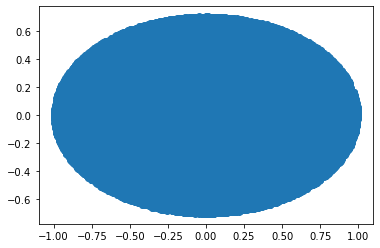

In [6]:
from matplotlib.pyplot import *
inx = []
iny = []
outx = []
outy = []
for i in range(100000):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    if (x**2+2*y**2<1): #inside
        inx.append(x)
        iny.append(y)
    else:
        outx.append(x)
        outy.append(y)
scatter(inx,iny)
#scatter(outx,outy)
show()

In [21]:
n=0 # set the counter of the points inside to zero N=10000 # total number of ‘experiments ‘
N = 10000
for i in range(N):
    x = random.uniform(-3,3)
    y = random.uniform(-3,3)
    z = random.uniform(-2,2)
    if (x**2+y**2-z**2<1 and z<2 and z>-2): #inside
        n = n+1 # increase the counter of the points inside
p1 = n/N # our estimate for the probability
S1 = p1*6*6*4 # our estimate for the area
error=6*6*4*sqrt(p1*(1-p1))/(sqrt(N)) # error of the approximation

In [22]:
S1-28*pi/3

-0.24793143350473557

In [38]:
from matplotlib.pyplot import *
inx = []
iny = []
inz=[]
outx = []
outy = []
outz=[]
for i in range(100000):
    x = random.uniform(-3,3)
    y = random.uniform(-3,3)
    z = random.uniform(-2,2)
    if (x**2+y**2-z**2<1 and z<2 and z>-2): #inside
        inx.append(x)
        iny.append(y)
        inz.append(z)
    else:
        outx.append(x)
        outy.append(y)
        outz.append(z)
Axes3D.scatter(inx, iny, inz)
Axes3D.scatter(outx, outy, outz)
#scatter(inx, iny, inz, depthshade=True)
#scatter(outx, outy, outz, depthshade=True)
#scatter(inx,iny,inz)
#scatter(outx,outy,outz)
show()

AttributeError: 'list' object has no attribute 'has_data'

In [43]:
def w(x):                           #Given
    return math.exp(-x)

a=0
b=inf

In [44]:
from scipy import integrate
def h(k):
    return integrate.quad(lambda x: w(x)*x**k,a,b)[0]

In [46]:
h(3)

6.0

In [60]:
def nodesAndWeights(n):
    # finding xi
    B = array([[0.]*(n+1)]*(n+1))    # arrays of 0's, with "0." we tell python that these are floating point numbers
    u = array([0.]*(n+1))
    for k in range(n+1):
        u[k] = - h(n+1+k)
        for i in range(n+1):
            B[k,i] = h(k+i)
    cs = linalg.solve(B,u)
    cs = append(cs,[1])        # must add last coefficient which is 1
    xs = roots(cs[::-1]).real   # roots calculats roots of polynomial, but with inverse order of coefficients
    # finding Ai
    As = array([0.]*(n+1))
    for k in range(n+1):
        u[k] = h(k)
        for i in range(n+1):
            B[k,i] = xs[i]**k
    As = linalg.solve(B,u)
    return xs, As

In [54]:
print("n=0",nodesAndWeights(0),"n=1",nodesAndWeights(1))

n=0 (array([1.]), array([1.])) n=1 (array([3.41421356, 0.58578644]), array([0.14644661, 0.85355339]))


In [63]:
def f(n):
    # finding xi
    B = array([[0.]*(n+1)]*(n+1))    # arrays of 0's, with "0." we tell python that these are floating point numbers
    u = array([0.]*(n+1))
    for k in range(n+1):
        u[k] = - h(n+1+k)
        for i in range(n+1):
            B[k,i] = h(k+i)
    cs = linalg.solve(B,u)
    cs = append(cs,[1])        # must add last coefficient which is 1
    xs = roots(cs[::-1]).real   # roots calculats roots of polynomial, but with inverse order of coefficients
    # finding Ai
    As = array([0.]*(n+1))
    for k in range(n+1):
        u[k] = h(k)
        for i in range(n+1):
            B[k,i] = xs[i]**k
    As = linalg.solve(B,u)
    return sum(As*sin(xs))

0.49602982748056323

In [65]:
for i in range(10):
    print(f(i)-1/2)

0.3414709848078965
-0.06754054532015613
-0.003970172519436765
0.00487927946019906
-0.0010966790439331797
4.947479765515794e-05
3.8911994807322436e-05
-1.2246264152249164e-05
1.352425765155374e-06
2.0499510755556116e-07
